---
title: Soundscapy
subtitle: A Python Package for Soundscape Assessment and Analysis
author:
  - name: Andrew Mitchell
    orcid: 0000-0003-0978-5046
    email: a.j.mitchell@ucl.ac.uk
    affiliation: Bartlett School of Sustainable Construction
institute: University College London
format:
  clean-revealjs: 
    code-overflow: wrap
html-math-method:
  method: mathjax
  url: 'https://cdn.jsdelivr.net/npm/mathjax@3/es5/tex-mml-chtml.js'
date: '2024-08-26'
bibliography: FellowshipRefs-biblatex.bib
execute:
  echo: true
  freeze: auto
  cache: true
  keep-ipynb: true
jupyter: python3
---

In [2]:
#| echo: false
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import warnings

warnings.simplefilter("ignore")

## Introduction {.smaller}

:::::: columns
:::: {.column width="50%"}
-   Soundscape: holistic approach to acoustic environments
-   ISO 12913 series (since 2018) provides standardized framework
-   Challenges in consistent application of standards

::: fragment
Soundscapy addresses these challenges:

-   Open-source Python package
-   Aligns with ISO 12913-3 guidelines
-   Facilitates consistent, reproducible analysis
:::
::::

::: {.column width="50%"}
![ISO 12913-3 recommendations for soundscape analysis](images/ISO12913-3-screenshot.png)
:::
::::::

::: notes
Introduce the concept of soundscape and its holistic approach. Mention the ISO 12913 series and its role in standardizing soundscape assessment. Highlight the challenges in applying these standards consistently. Introduce Soundscapy as a solution to these challenges.
:::

## Soundscapy: Origins and Purpose {.smaller}

::::::: columns
::::: {.column width="60%"}
-   Developed during the Soundscape Indices (SSID) project
-   Built on the SSID Protocol for data collection
-   Utilizes the International Soundscape Database (ISD)

::: fragment
-   Key features:
    -   Visualization using distributional methods
    -   Psychoacoustic and acoustic analysis of binaural data
    -   Optimized for large-scale data processing
:::

::: fragment
### Simple to install

``` bash
pip install soundscapy
```


In [3]:
import soundscapy as sspy

:::
:::::

::: {.column width="40%"}
![Soundscapy Logo](images/LightLogo.png){.r-stretch}
:::
:::::::

::: notes
Explain the origins of Soundscapy in the SSID project. Highlight its connection to the SSID Protocol and the ISD. Briefly introduce the key features, emphasizing its capabilities in visualization and data processing.
:::

## Soundscape Circumplex Model {.smaller}

::::: columns
::: {.column width="40%"}
-   Proposed by @Axelsson2010principal
-   Two orthogonal dimensions:
    -   Pleasant-Annoying (x-axis)
    -   Eventful-Uneventful (y-axis)
-   Eight perceptual scales
-   Adopted in ISO/TS 12913-2
:::

::: {.column width="60%"}

In [4]:
#| echo: false
sample_transform = {
    "RecordID": ["EX1", "EX2"],
    "pleasant": [4, 2],
    "vibrant": [4, 3],
    "eventful": [4, 5],
    "chaotic": [2, 5],
    "annoying": [1, 5],
    "monotonous": [3, 5],
    "uneventful": [3, 3],
    "calm": [4, 1],
}
sample_transform = pd.DataFrame().from_dict(sample_transform)
sample_transform = sample_transform.set_index("RecordID")

<PolarAxes: >

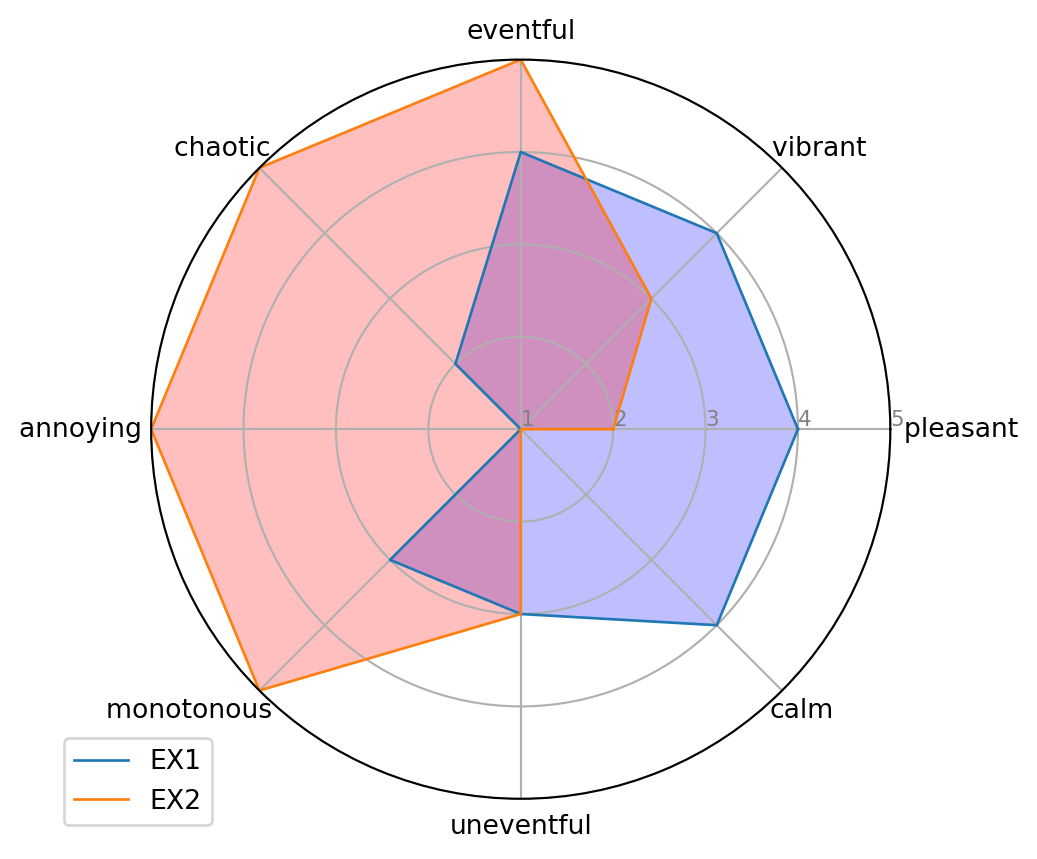

In [5]:
from soundscapy.plotting import likert
likert.paq_radar_plot(sample_transform)

:::
:::::

::: notes
Explain the Soundscape Circumplex Model in more detail. Highlight its importance in standardizing soundscape assessment. Mention its adoption in ISO/TS 12913-2 and its widespread use in research.
:::

## ISO Coordinates Calculation {.smaller}

::::: columns
::: {.column width="40%"}
-   Implements equations from ISO 12913-3
-   Transforms 8 PAQ responses into 2D coordinates
-   Flexible input ranges (e.g., 1-5, 0-100)
-   Supports different angle configurations

$$
P_{ISO} = \frac{1}{\lambda_{Pl}} \sum_{i=1}^{8} \cos{\theta_i} \cdot \sigma_i
$$ {#eq-isopl}

$$
E_{ISO} = \frac{1}{\lambda_{Pl}} \sum_{i=1}^{8} \sin{\theta_i} \cdot \sigma_i
$$ {#eq-isoev}
:::

::: {.column width="60%"}

In [6]:
# Load data from the ISD
data = sspy.isd.load()

# Apply built-in data quality checks
data, excl_data = sspy.isd.validate(data, allow_paq_na=False)

# Calculate the ISO Coordinates
data = sspy.surveys.add_iso_coords(data)

In [7]:
#| echo: false
view_data = sspy.surveys.return_paqs(data, incl_ids = False, other_cols = ['ISOPleasant', 'ISOEventful'])
view_data.head(5)

,PAQ1,PAQ2,PAQ3,PAQ4,PAQ5,PAQ6,PAQ7,PAQ8,ISOPleasant,ISOEventful
0,2.0,4.0,2.0,1.0,2.0,2.0,4.0,2.0,0.219670,-0.133883
1,2.0,4.0,4.0,4.0,4.0,4.0,1.0,1.0,-0.426777,0.530330
2,5.0,3.0,3.0,1.0,2.0,1.0,3.0,4.0,0.676777,-0.073223
3,5.0,3.0,3.0,1.0,2.0,2.0,3.0,4.0,0.603553,-0.146447
4,5.0,3.0,3.0,2.0,2.0,3.0,3.0,4.0,0.457107,-0.146447


:::
:::::

::: notes
Explain the purpose and functionality of the `calculate_iso_coords` function. Highlight its alignment with ISO 12913-3 equations. Emphasize its flexibility in handling different input ranges and angle configurations. Mention how this function is central to Soundscapy's analysis capabilities.
:::

## Distribution-based Analysis {.smaller}

::::::::: columns
::: {.column width="50%"}
-   Developed by @Mitchell2022How
-   Represents the collective perception of a soundscape as a distribution, using kernel density estimation
-   Provides far richer insight than point estimates
:::

::::::: {.column width="50%"}
:::::: r-stack
::: fragment

<Axes: title={'center': 'Camden Town Soundscape Distribution'}, xlabel='ISOPleasant', ylabel='ISOEventful'>

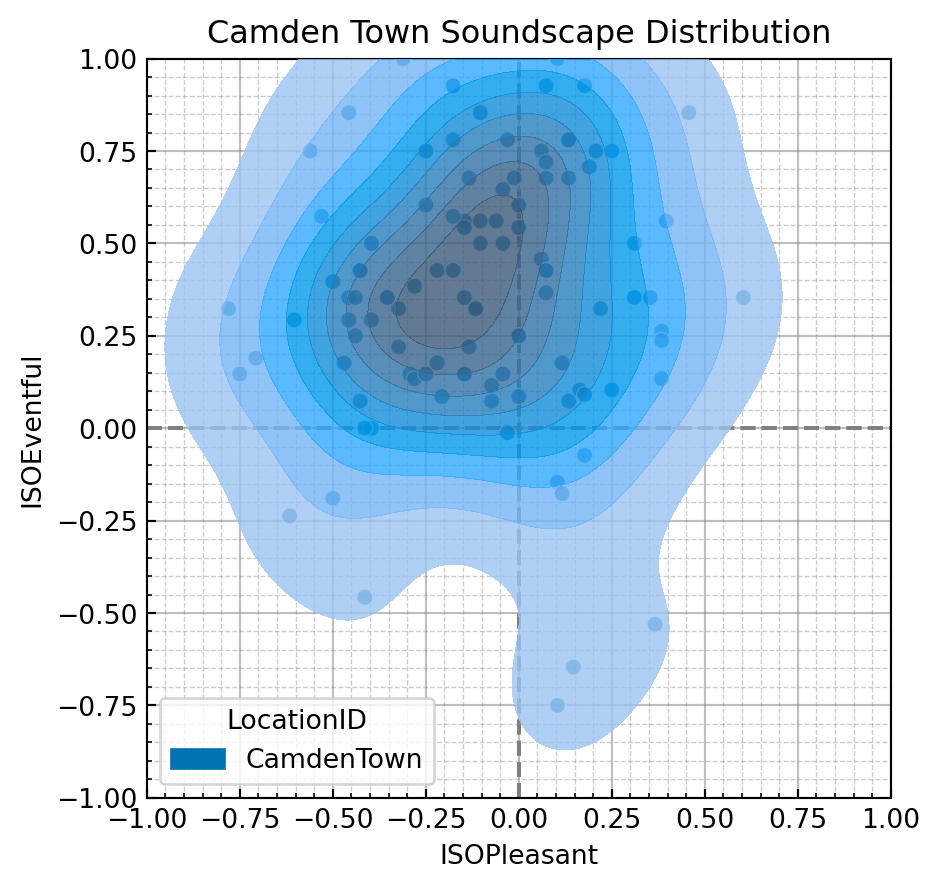

In [8]:
#| code-line-numbers: '|1|2|3,4,5'
sspy.plotting.density_plot(
  sspy.isd.select_location_ids(data, "CamdenTown"),
  title="Camden Town Soundscape Distribution",
  hue="LocationID",
  incl_scatter=True
)

:::

::: fragment

<Axes: title={'center': 'Comparison between two soundscapes'}, xlabel='ISOPleasant', ylabel='ISOEventful'>

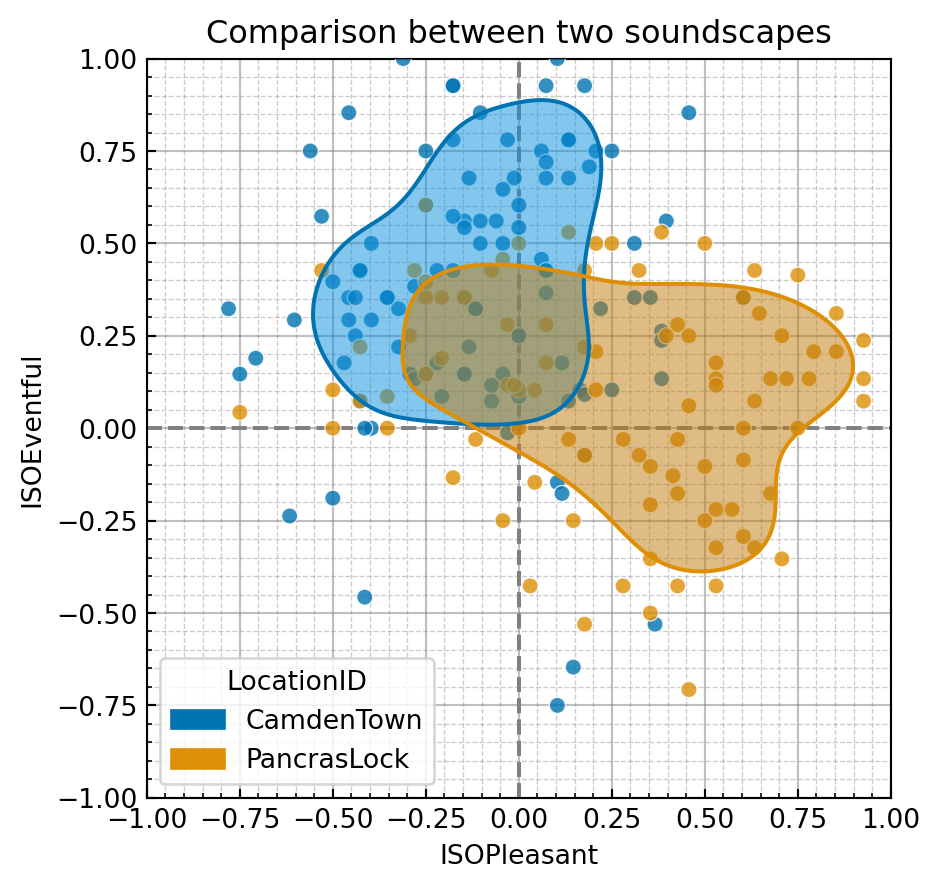

In [9]:
#| code-line-numbers: '2,7'
sspy.plotting.density_plot(
  sspy.isd.select_location_ids(data, ("CamdenTown", "PancrasLock")),
  title = "Comparison between two soundscapes",
  hue = "LocationID",
  incl_scatter=True,
  incl_outline=True,
  simple_density=True,
)

:::

::: fragment

In [10]:
#| code-line-numbers: "|1,6"
from soundscapy.plotting import Backend
import plotly.io as pio

sspy.plotting.scatter_plot(
  sspy.isd.select_location_ids(data, ("RegentsParkJapan")),
  backend = Backend.PLOTLY,
  title = "Regents Park Japanese Garden Soundscape",
)

:::
::::::
:::::::
:::::::::

::: notes
This distribution-based visualisation and analysis clearly shows three important characteristics of the soundscape perception of a group or location: 1. The distribution across both pleasantness and eventfulness, including the central tendency, the dispersion, and any skewness in the response. 2. The general shape of the soundscape within the circumplex space - in this case, Pancras Lock is mostly in the pleasant half, with a slight skew towards eventfulness. Proceedings of INTER-NOISE 2024 3. The degree of agreement about the soundscape perception among the sample. In addition to these visualisations, Soundscapy provides functions for calculating some basic statistics about the distribution of responses, such as the mean, median, and standard deviation, as well as metrics inspired by reporting from noise annoyance studies, such as the percentage of respondents who rated the soundscape as ‘pleasant’ or ‘eventful’.
:::

## Databases Integration {.smaller}

::::: columns
::: {.column width="50%"}
-   International Soundscape Database (ISD)
    -   2,706 recordings
    -   3,590 survey responses
    -   6 cities across Europe and China
-   Soundscape Attributes Translation Project (SATP)
    -   19,089 responses
    -   708 participants
    -   19 languages
-   ARAUS
    -   Currently under development
:::

::: {.column width="50%"}

In [11]:
# Load ISD data
isd_data = sspy.isd.load()

# Load SATP data
import soundscapy.databases.satp as satp
# satp_data = satp.load_zenodo()

print(f"ISD shape: {isd_data.shape}")
# print(f"SATP shape: {satp_data.shape}")

sspy.isd.soundscapy_describe(isd_data).head(5)

ISD shape: (3589, 142)


,count,ISOPleasant,ISOEventful,pleasant,eventful,vibrant,chaotic,monotonous,calm
CarloV,126,0.518,-0.012,0.865,0.413,0.365,0.048,0.008,0.484
SanMarco,99,0.221,0.373,0.707,0.848,0.616,0.222,0.020,0.091
PlazaBibRambla,24,0.463,-0.023,0.667,0.417,0.375,0.042,0.042,0.292
CamdenTown,105,-0.103,0.364,0.352,0.895,0.295,0.600,0.038,0.057
EustonTap,100,-0.211,0.190,0.240,0.780,0.170,0.610,0.140,0.060


:::
:::::

::: notes
Explain the significance of the integrated databases. Highlight the ease of loading and working with these datasets in Soundscapy. Mention the potential for cross-cultural and multi-lingual soundscape studies.
:::

## Psychoacoustic Analysis {.smaller}

::::: columns
::: {.column width="50%"}
-   Integration with multiple libraries:
    -   Python Acoustics
    -   scikit-maad
    -   MoSQITo
-   Wide range of metrics:
    -   SPL ($L_{Zeq}$, $L_{Aeq}$, $L_{Ceq}$)
    -   Loudness (N)
    -   Sharpness (S)
    -   Roughness (R)
    -   Many more...
:::

::: {.column width="50%"}

In [12]:
from soundscapy.audio.analysis_settings import MetricSettings
from soundscapy.audio import Binaural

b = Binaural.from_wav("data/CT101.wav")

laeq_settings = MetricSettings(
    run = True,
    statistics = (5, 50, 'avg', 'max'),
    label="LAeq",
)

b.pyacoustics_metric('LAeq', metric_settings=laeq_settings).round(2)

LAeq  LAeq_5  LAeq_50  LAeq_max
Recording Channel                                  
CT101     Left     68.89   72.27    68.12     77.39
          Right    69.96   73.63    68.50     78.71

:::
:::::

::: notes
Highlight the comprehensive psychoacoustic analysis capabilities. Mention the integration with established libraries. Emphasize the simplicity of performing complex analyses. Discuss the importance of these metrics in soundscape assessment.
:::

## Batch Processing and Performance {.smaller}

::::: columns
::: {.column width="50%"}
- **Unified Output Format**: Ensures consistency across datasets, simplifying analysis.

- **Parallel Processing**: Leverages multi-core CPUs for efficient computation.

- **Large Dataset Optimization**: Handles substantial volumes of data effectively.

- **Performance Gains**: Significant improvements in processing speed.

- **Scalability**: Enables extensive soundscape studies previously impractical.

**Performance Example**:
- 20 recordings (10 min 41 sec total)
- Serial processing: 29.4 minutes
- Parallel processing: 7.7 minutes
- Speed-up factor: 3.8x
:::

::: {.column width="50%"}

In [13]:
#| eval: false
from soundscapy.audio import AudioAnalysis

wav_folder = Path("data")

# Initialize AudioAnalysis with default settings
analysis = AudioAnalysis()

# Analyse a folder of recordings
folder_results = analysis.analyze_folder(
    wav_folder, 
    calibration_file="data/Levels.json"
)

# Print results
folder_results.head()

:::
:::::

::: notes
Explain batch processing benefits:
1. Unified output for consistency and simplified analysis.
2. Parallel processing for faster computations.
3. Optimization for large datasets enabling comprehensive studies.
4. Use performance example to illustrate real-world benefits.
5. Emphasize how these features enable new types of large-scale research.
:::

## Customization and Flexibility {.smaller}

::::: columns
::: {.column width="50%"}
- **Reproducible Analysis**: YAML-based configs ensure consistent, replicable results.

- **Version Control Friendly**: Easily track, share, and collaborate on configurations.

- **Data Format Versatility**: Supports various input/output formats for compatibility.

- **Data Science Integration**:
  - Works with pandas for data manipulation
  - Compatible with matplotlib and seaborn for visualizations
  - Leverages popular Python libraries

- **Extensible Architecture**: 
  - Allows addition of new metrics and methods
  - Adaptable to diverse research requirements
  - Potential for community-driven improvements
:::

::: {.column width="50%"}

In [14]:
from soundscapy.audio import AudioAnalysis
analysis = AudioAnalysis()
# Customize analysis settings
new_config = {
  "MoSQITo": {
    "loudness_zwtv": {
      "statistics": ("avg", 5, 50),
      "func_args": {"field_type": "diffuse"}
    }
  }
}

analysis.update_config(new_config)
analysis.save_config("updated_config.yaml")

In [15]:
#| echo: false
import yaml
with open("updated_config.yaml") as f:
  updated_config = yaml.safe_load(f)

print(yaml.dump(updated_config['MoSQITo']))

loudness_zwtv:
  channel:
  - Left
  - Right
  func_args:
    field_type: diffuse
  label: N
  main: 5
  parallel: true
  run: false
  statistics:
  - avg
  - 5
  - 50
roughness_dw:
  channel:
  - Left
  - Right
  func_args: {}
  label: R
  main: avg
  parallel: true
  run: true
  statistics:
  - 5
  - 10
  - 50
  - 90
  - 95
  - min
  - max
  - kurt
  - skew
  - avg
sharpness_din_from_loudness:
  channel:
  - Left
  - Right
  func_args:
    field_type: free
    weighting: din
  label: S_L
  main: avg
  parallel: true
  run: true
  statistics:
  - 5
  - 10
  - 50
  - 90
  - 95
  - min
  - max
  - kurt
  - skew
  - avg
sharpness_din_perseg:
  channel:
  - Left
  - Right
  func_args:
    field_type: free
    nperseg: 4096
    weighting: din
  label: S_perseg
  main: avg
  parallel: false
  run: true
  statistics:
  - 5
  - 10
  - 50
  - 90
  - 95
  - min
  - max
  - kurt
  - skew
  - avg
sharpness_din_tv:
  channel:
  - Left
  - Right
  func_args:
    field_type: free
    skip: 0.5
    w

:::
:::::

::: notes
Explain flexibility and customization features:
1. YAML configs for reproducibility in research.
2. Version control benefits for collaborative projects.
3. Advantages of supporting various data formats.
4. Integration with data science tools and implications for workflows.
5. Extensible architecture allowing adaptation to different research needs.
6. How these features make Soundscapy versatile for various soundscape studies.
:::

## Package Documentation {.smaller}

::::: columns
::: {.column width="40%"}
- **Comprehensive Documentation**:
  - Installation guide
  - Quickstart tutorials
  - API reference
  - Example notebooks

- **GitHub Repository**:
  - Open-source code
  - Issue tracking
  - Contribution guidelines

- **Regular Updates**:
  - Version changelog
  - Deprecation notices
  - New feature announcements
:::

::::: {.column width="60%"}
:::: {.r-stack}
::: {.fragment}
![Soundscapy Documentation Homepage](images/soundscapy-homepage.png)
:::

:::{.fragment}
![ - ](images/binaural-tutorial.png)

:::

::::
:::::

:::::

::: notes
Highlight the comprehensive nature of the documentation.
Mention the open-source aspect and community involvement possibilities.
Emphasize the commitment to keeping the package and its documentation up-to-date.
:::

## Future Work: Predictive Models {.smaller}

::::: columns
::: {.column width="50%"}
- **Pretrained Models Integration**:
  - Predict soundscape perception from acoustic features
  - Multiple model support for comparison

- **Automated Assessment**:
  - Rapid evaluation of new soundscapes
  - Potential for real-time analysis

- **Design Optimization**:
  - Predict impact of soundscape interventions
  - Assist in urban planning decisions
:::

::: {.column width="50%"}
![Predictive Model Interface Prototype](images/predictive_model_screenshot.png)
:::
:::::

::: notes
Explain the potential of integrating pretrained models for soundscape prediction.
Discuss the implications for automated assessment and design optimization.
Highlight how this could change the landscape of soundscape research and urban planning.
:::

## Future Work: Soundscape Perception Indices (SPI) {.smaller}

::::: columns
::: {.column width="50%"}
- **Single Index Calculation**:
  - Simplify complex soundscape data
  - Enable quick comparisons between locations

- **Standardized Reporting**:
  - Facilitate communication with stakeholders
  - Support policy-making processes

- **Customizable Weighting**:
  - Adapt to different cultural contexts
  - Account for varying research priorities
:::

::: {.column width="50%"}
![SPI Calculation Interface Prototype](images/SPI-framework.drawio.png)
:::
:::::

::: notes
Introduce the concept of Soundscape Perception Indices (SPI).
Explain how it simplifies complex data for easier interpretation and comparison.
Discuss the potential applications in urban planning, policy-making, and cross-cultural studies.
:::

## Conclusion {.smaller}

- **Standardized Analysis**: Consistent with ISO 12913-3 guidelines

- **User-Friendly**: Easy-to-use Python package for researchers and practitioners

- **Powerful Tools**: 
  - Distribution-based visualization
  - Comprehensive psychoacoustic analysis
  - Efficient batch processing

- **Future-Ready**: 
  - Ongoing development for predictive models
  - SPI for simplified soundscape assessment

- **Get Involved**:
  - GitHub: [github.com/MitchellAcoustics/Soundscapy](https://github.com/MitchellAcoustics/Soundscapy)
  - Docs: [soundscapy.readthedocs.io](https://soundscapy.readthedocs.io)
  - PyPI: `pip install soundscapy`

::: notes
Summarize the key benefits and features of Soundscapy.
Emphasize its alignment with ISO standards and its user-friendly nature.
Highlight the ongoing development and future directions.
Encourage audience engagement and contributions.
Provide clear information on how to access and start using Soundscapy.
:::

## References